**Install Dependencies**

In [1]:
%pip install labelme tensorflow tensorflow-gpu opencv-python-headless matplotlib albumentations

  Using cached labelme-5.1.1-py3-none-any.whl
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached natsort-8.2.0-py3-none-any.whl (37 kB)
  Using cached imgviz-1.7.2-py3-none-any.whl (7.7 MB)
  Using cached scikit_image-0.19.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.9 MB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached imageio-2.25.1-py3-none-any.whl (3.4 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-p

**Collect Images Using OpenCV**

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collection images {}'.format(imgnum))
    ret, frame = cap.read()
    frame=cv2.flip(frame, 1)
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Collection images 0


QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread (0x302d090).
Cannot move to target thread (0x2cd6dc0)

QObject::moveToThread: Current thread (0x2cd6dc0) is not the object's thread

Collection images 1
Collection images 2
Collection images 3
Collection images 4
Collection images 5
Collection images 6
Collection images 7
Collection images 8
Collection images 9
Collection images 10
Collection images 11
Collection images 12
Collection images 13
Collection images 14
Collection images 15
Collection images 16
Collection images 17
Collection images 18
Collection images 19
Collection images 20
Collection images 21
Collection images 22
Collection images 23
Collection images 24
Collection images 25
Collection images 26
Collection images 27
Collection images 28
Collection images 29


**Annotate Images with LabelMe**

In [2]:
!labelme

**Review Dataset and Build Image Loading Function**

Import TF and Deps

In [4]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

2023-02-18 23:46:06.234648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 23:46:06.943034: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rishabh/anaconda3/envs/amaterasu/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-18 23:46:06.943080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rishabh/anaconda3/envs/amaterasu/lib/py

Limit GPU Memory Growth

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[]


Load Image into TF Data Pipeline

In [5]:
images = tf.data.Dataset.list_files('./data/images/*.jpg', shuffle=False)

2023-02-18 17:25:23.394355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 17:25:23.396875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 17:25:23.397127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 17:25:23.397256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: ./data/images/*.jpg'

In [9]:
images.as_numpy_iterator().next()

b'./data/images/022acdde-af56-11ed-ba13-f889d27df313.jpg'

In [7]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[ 17,  34,  24],
        [ 16,  33,  23],
        [ 17,  32,  25],
        ...,
        [164, 160, 115],
        [163, 159, 112],
        [163, 159, 112]],

       [[ 16,  33,  23],
        [ 15,  32,  22],
        [ 15,  32,  24],
        ...,
        [163, 159, 114],
        [163, 159, 112],
        [163, 159, 112]],

       [[ 12,  32,  23],
        [ 12,  32,  23],
        [ 12,  32,  23],
        ...,
        [163, 159, 114],
        [162, 159, 114],
        [162, 159, 114]],

       ...,

       [[104, 137, 144],
        [104, 137, 144],
        [106, 139, 146],
        ...,
        [213, 247, 246],
        [213, 247, 246],
        [214, 248, 247]],

       [[105, 135, 143],
        [104, 134, 142],
        [104, 137, 144],
        ...,
        [213, 247, 246],
        [213, 247, 246],
        [213, 247, 246]],

       [[105, 135, 143],
        [104, 134, 142],
        [104, 137, 144],
        ...,
        [213, 247, 246],
        [212, 246, 245],
        [212, 246, 245]]

In [14]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

View Raw Images with Matplotlib

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [22]:
plot_images = image_generator.next()

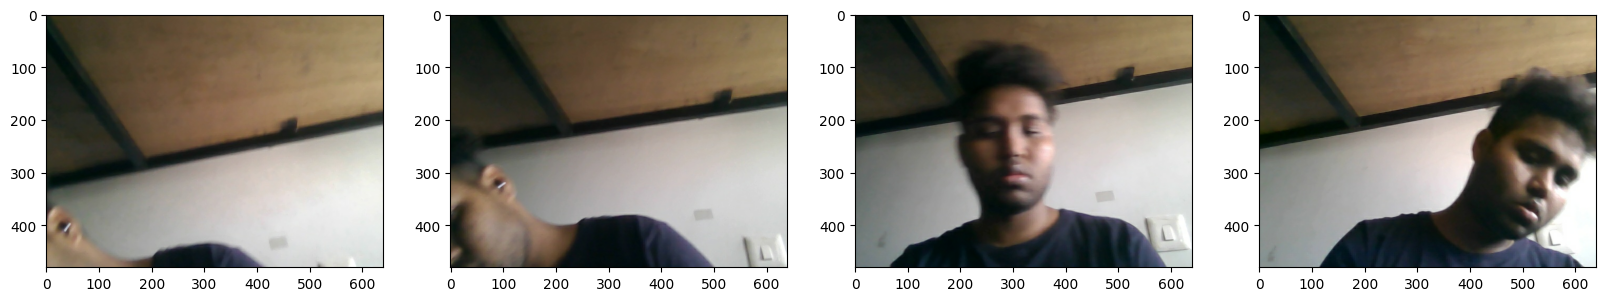

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

**Partition Unaugmented Data**

Manually split data into Train, Test and Val

In [26]:
120*.7

84.0

In [27]:
120*.15

18.0

Move the matching labels

In [28]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)

        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

**Apply Image Augmentation on Images and Labels using Albumentations**

Setup Albumentations Tranform Pipeline

In [8]:
import albumentations as alb 

In [9]:
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
],
    bbox_params=alb.BboxParams(
        format='albumentations', label_fields=['class_labels'])
)

**Test Augmentation**

Load a Test Image and Annotation with OpenCV and JSON

In [9]:
img = cv2.imread(os.path.join('data','train','images', '0ad1ed3c-af56-11ed-ba13-f889d27df313.jpg'))

In [10]:
with open(os.path.join('data','train','labels','0ad1ed3c-af56-11ed-ba13-f889d27df313.json'), 'r') as f:
    label = json.load(f)

In [37]:
label['shapes'][0]['points']

[[163.70370370370367, 85.55555555555554],
 [348.88888888888886, 320.3703703703704]]

Extract Coordinates and Rescale to Match Image Resolution

In [41]:
coors = list(np.divide(np.array(label['shapes'][0]['points']).flatten(), [640,480,640,480]))
print(coors)

[0.255787037037037, 0.17824074074074073, 0.5451388888888888, 0.6674382716049383]


Apply Augmentations and View Results

In [42]:
augmented = augmentor(image=img, bboxes=[coors], class_labels=['face'])

In [45]:
augmented['bboxes']

[(0.20823045267489704,
  0.3147325102880658,
  0.619753086419753,
  0.8365432098765433)]

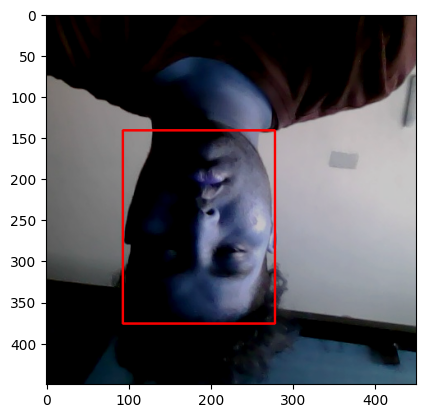

In [46]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes']
                    [0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes']
                    [0][2:], [450, 450]).astype(int)),
              (250, 0, 0),
              2
              )
plt.imshow(augmented['image'])

**Build and Run Augmentation Pipeline**

Run Augmentation Pipeline

In [49]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0, 0, 0.0001, 0.0001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords = list(np.divide(np.array(label['shapes'][0]['points']).flatten(), [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels',f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as exception:
            print(exception)

x_max is less than or equal to x_min for bbox [0.21260245901639346, 0.8401639344262294, 0.0, 0.4696816317437852, 'face'].
x_max is less than or equal to x_min for bbox [0.5752314814814815, 0.652006172839506, 0.2847222222222222, 0.15354938271604937, 'face'].
x_max is less than or equal to x_min for bbox [0.41034836065573776, 0.3777322404371584, 0.04508196721311481, 0.9282786885245902, 'face'].


Load Augmented Images to Tensorflow Dataset

In [10]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-02-18 23:47:04.548111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [12]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/255)

**Prepare Labels**

Build Label Loading Function

In [13]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)

    return [label['class']], label['bbox']

Load Labels to TensorFlow Dataset

In [14]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

**Combine Label and Image Samples**

Check Partition Lengths

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels), 

(4980, 4980, 960, 960, 1080, 1080)

Create Final Dataset (Images/Labels)

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5200)
train = train.batch(8)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1600)
test = test.batch(8)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1800)
val = val.batch(8)
val = val.prefetch(4)

View Images and Annotations

In [22]:
data_samples = train.as_numpy_iterator()

In [76]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


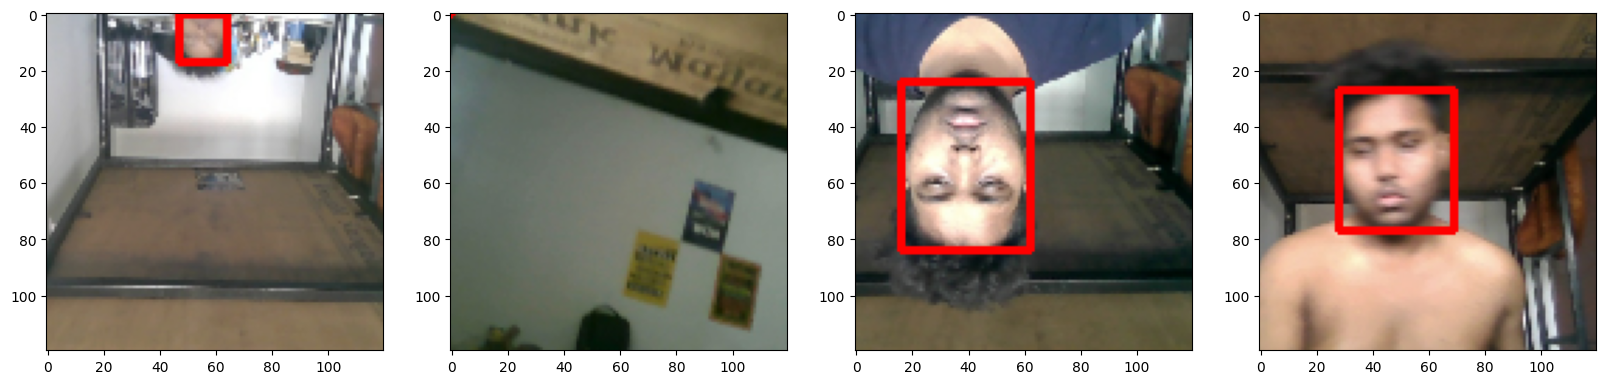

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
      sample_image = res[0][idx]
      sample_coords = res[1][1][idx]

      cv2.rectangle(sample_image,
                    tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                    tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                    (255, 0, 0),2
      )
      ax[idx].imshow(sample_image)

**Build Deep Learning Model using the Functional API**

Import Layers and Base Network

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

Download VGG16

In [22]:
vgg = VGG16(include_top=False)

In [23]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Build Instance of Network

In [24]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))

    vgg = VGG16(include_top=False)(input_layer)

    #  Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    #  Bounding Box Model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

Test out Neural Network

In [25]:
facetracker = build_model()

In [26]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [32]:
X, y = train.as_numpy_iterator().next()

In [33]:
X.shape

(8, 120, 120, 3)

In [34]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 305ms/step


In [35]:
classes, coords

(array([[0.5847869 ],
        [0.36444736],
        [0.41317326],
        [0.47018567],
        [0.47732005],
        [0.33665714],
        [0.33491117],
        [0.4507912 ]], dtype=float32),
 array([[0.69939095, 0.55368125, 0.48204538, 0.4960501 ],
        [0.74817735, 0.6958863 , 0.48996297, 0.39157015],
        [0.78119826, 0.68527114, 0.51558644, 0.42387977],
        [0.67589307, 0.6868892 , 0.5527029 , 0.53142655],
        [0.7353674 , 0.5584519 , 0.49565515, 0.5613819 ],
        [0.78102267, 0.64598674, 0.54357266, 0.43954653],
        [0.7773079 , 0.5898251 , 0.5272714 , 0.52939236],
        [0.73449475, 0.5754351 , 0.4948251 , 0.41985095]], dtype=float32))

**Define Losses and Optimizers**

Define Optimizer and LR

In [27]:
batches_per_epoch = len(train)
lr_decay = (1./.75 - 1)/batches_per_epoch

In [28]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

Create Localization Loss and Classification loss

In [29]:
def localization_loss(y_true, y_hat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - y_hat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = y_hat[:,3] - y_hat[:,1]
    w_pred = y_hat[:,2] - y_hat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [30]:
classLoss = tf.keras.losses.BinaryCrossentropy()
regressLoss = localization_loss

Test out Loss Metrics

In [36]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.401426>

In [37]:
classLoss(y[0], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6078985>

In [38]:
regressLoss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.401426>

**Train Neural Network**

Create Custom Model Class

In [39]:
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs) -> None:
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classLoss, localizatioLoss, **kwargs):
        super().compile(**kwargs)
        self.cLoss = classLoss
        self.lLoss = localizatioLoss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classLoss = self.cLoss(y[0], classes)
            batch_localizationLoss = self.lLoss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationLoss + 0.5 * batch_classLoss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss":batch_classLoss, "localization_loss":batch_localizationLoss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=True)

        batch_classLoss = self.cLoss(y[0], classes)
        batch_localizationLoss = self.lLoss(tf.cast(y[1], tf.float32), coords)

        total_loss = batch_localizationLoss + 0.5 * batch_classLoss

        return {"total_loss": total_loss, "class_loss":batch_classLoss, "localization_loss":batch_localizationLoss}
    
    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [40]:
model = FaceTracker(facetracker)

In [41]:
model.compile(opt, classLoss, regressLoss)

Train

In [42]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/opt/cuda'

In [103]:
model.opt.learning_rate = 0.000001
hist = model.fit(train, epochs=8, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/8
 94/623 [===>..........................] - ETA: 6:40 - total_loss: 0.0107 - class_loss: 4.7271e-04 - localization_loss: 0.0104

KeyboardInterrupt: 

**Make Predictions**

In [56]:
test_data = test.as_numpy_iterator()

In [57]:
test_sample = test_data.next()

In [76]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 152ms/step


In [77]:
yhat[0]

array([[0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9999976e-01],
       [1.0000000e+00],
       [1.4388904e-08],
       [1.9488500e-09]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


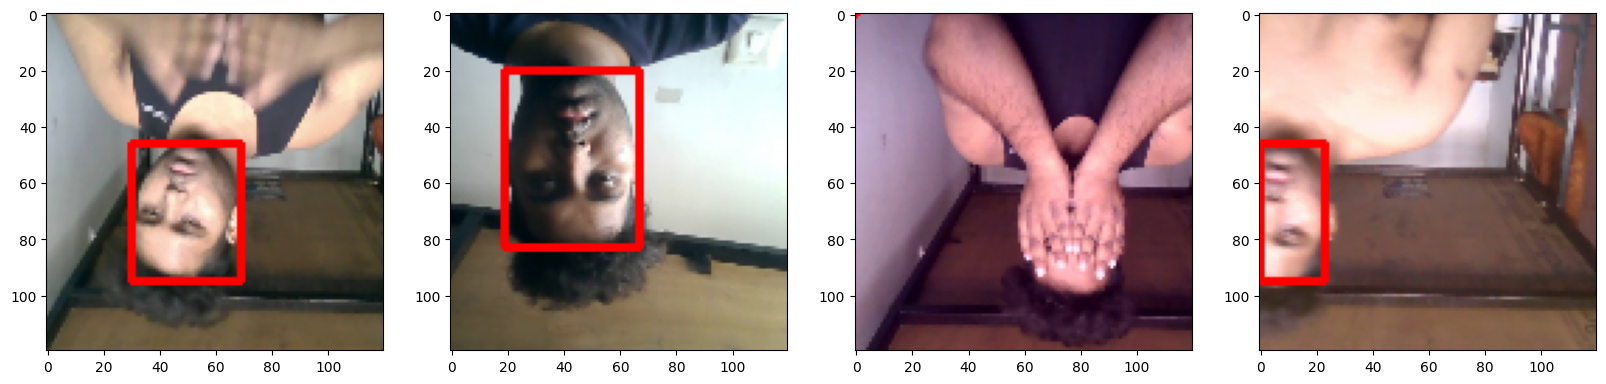

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = test_sample[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2
                  )
    ax[idx].imshow(sample_image)

**Save Model**

In [45]:
from tensorflow.keras.models import load_model

In [55]:
facetracker.save('facetracker.h5')

In [107]:
facetracker = load_model('facetracker_old.h5')

**Real Time Face Detection**

In [93]:
cap.release()
cv2.destroyAllWindows()


In [110]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    y_hat = facetracker.predict(np.expand_dims(resized/255, 0))
    sample_coords = y_hat[1][0]

    print(sample_coords)

    if yhat[0].any() > 0.95:
        #  Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255, 0, 0), 2)
        
        #  Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [80, 0])),
                      (255, 0, 0), -1)
        
        #  Controls the text rendered.
        # cv2.putText(frame, 'face',
        #             tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),[0, -5])),
        #             cv2.FONT_HERSHEY_SIMPLEX, (255,255,255), 2, cv2.LINE_AA
        #             )
    
    frame = cv2.flip(frame, 1)
    cv2.imshow('FaceTracker', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 39ms/step
[0.02756944 0.02597043 0.10189568 0.11332188]
1/1 [==============================] - 0s 39ms/step
[0.0293954  0.0258738  0.11164012 0.11594957]


QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is not the object's thread (0x10810580).
Cannot move to target thread (0x10b18820)

QObject::moveToThread: Current thread (0x10b18820) is n

1/1 [==============================] - 0s 42ms/step
[0.03186214 0.02764415 0.12574293 0.12916037]
1/1 [==============================] - 0s 40ms/step
[0.03123414 0.02713929 0.12310569 0.12739281]
1/1 [==============================] - 0s 43ms/step
[0.03026566 0.02366092 0.12102824 0.11921434]
1/1 [==============================] - 0s 45ms/step
[0.02669682 0.02165212 0.10420407 0.1040516 ]
1/1 [==============================] - 0s 44ms/step
[0.02438288 0.02233114 0.10134823 0.11099599]
1/1 [==============================] - 0s 48ms/step
[0.02343488 0.03078577 0.0968963  0.13077633]
1/1 [==============================] - 0s 41ms/step
[0.05215661 0.06710903 0.21280658 0.30582517]
1/1 [==============================] - 0s 42ms/step
[0.16427356 0.12990807 0.46183512 0.5219987 ]
1/1 [==============================] - 0s 36ms/step
[0.18208152 0.12397785 0.5086198  0.549049  ]
1/1 [==============================] - 0s 37ms/step
[0.18024206 0.13239412 0.5062656  0.558817  ]
1/1 [===============